In [3]:
import sys
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, roc_curve, auc

In [4]:
data = pd.read_csv("D:\pythonProject7\库存合并3.csv")
print(data)

      dfsdev2   WMHD/1000     BETAP  PLHI2/1000  PNBI1LSOURCE/1000  \
0    3.786213  150.062665  1.809148    1.771008          -0.000024   
1    3.814039  153.717101  1.872722    1.764905          -0.000002   
2    3.902733  154.320308  1.913145    1.764600           0.000090   
3    3.877649  154.758403  1.988600    1.766736          -0.000053   
4    3.836375  155.324920  2.058595    1.759717          -0.000014   
..        ...         ...       ...         ...                ...   
832  6.148488  167.954306  1.017720    1.787335           1.660275   
833  7.403863  185.028516  1.226287    1.784894           1.631289   
834  7.175847  174.816678  1.266651    1.791302           1.653335   
835  6.604383  175.209990  1.405230    1.788556           1.659220   
836  6.053979  168.947659  1.500407    1.785199           1.652635   

     PNBI1RSOURCE/1000  PNBI2LSOURCE/1000  PNBI2RSOURCE/1000      G109  \
0         1.980000e-06          -0.000023      -7.350000e-06  0.017743   
1        -4

In [17]:
row_0 = list(data.loc[0])
row_num = data.iloc[:,0].size

print("data len: {}".format(len(row_0)))
print("row_num: {}".format(row_num))

y_list = []   # 用于存放标签数据
x_list = []   # 用于存放特征数据
for i in range(row_num):
    row_data_list = list(data.loc[i])
    y_list.append(row_data_list[0])
    x_list.append(row_data_list[1:])

# 将数据类型由 list 转换为 array
x_array = np.array(x_list)
y_array = np.array(y_list)

print("x_array shape: {}".format(x_array.shape))
print("y_array shape: {}".format(y_array.shape))
print("==================== Column Name ====================")
print(list(data.columns))


data len: 24
row_num: 837
x_array shape: (837, 23)
y_array shape: (837,)
==================== Column Name ====================
['dfsdev2', 'WMHD/1000', 'BETAP', 'PLHI2/1000', 'PNBI1LSOURCE/1000', 'PNBI1RSOURCE/1000', 'PNBI2LSOURCE/1000', 'PNBI2RSOURCE/1000', 'G109', 'G107', 'G106', 'KAPPA', 'AMINOR', 'Q95', 'LI', 'TRITOP', 'TRIBOT', 'DRSEP', 'PXUV33', 'PXUV7', 'WUta', 'pcrl01/1000000', 'pecrh', 'n3/n6']


In [18]:
# test_size=0.2   设置测试集的样本数量为全部样呗的 20%
# random_state=12 设置随机种子为 12
# shuffle=True    打乱样本数据的顺序
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=42, shuffle=True)


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test  shape: {}".format(x_test.shape))
print("y_test  shape: {}".format(y_test.shape))


x_train shape: (669, 23)
y_train shape: (669,)
x_test  shape: (168, 23)
y_test  shape: (168,)


In [19]:
# n_estimators：森林中决策树的数量
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

In [20]:

predict_value = rf.predict(x_test)
for idx,value in enumerate(predict_value):
    print("[predict]: idx = {}, label = {}, predict = {}".format(idx, y_test[idx], value))
 

[predict]: idx = 0, label = 5.346746727, predict = 5.49698967636
[predict]: idx = 1, label = 7.263970474, predict = 7.227123835869996
[predict]: idx = 2, label = 4.32791383, predict = 4.343428111770001
[predict]: idx = 3, label = 3.912047668, predict = 3.958804604209998
[predict]: idx = 4, label = 4.781760587, predict = 4.885827378600002
[predict]: idx = 5, label = 4.897347904, predict = 4.819237936620001
[predict]: idx = 6, label = 4.99620454, predict = 4.9603499532500015
[predict]: idx = 7, label = 6.114242622, predict = 5.988594466900006
[predict]: idx = 8, label = 6.184800521, predict = 6.739087905849998
[predict]: idx = 9, label = 6.048325901, predict = 5.964726901259999
[predict]: idx = 10, label = 4.92296378, predict = 5.081378092409997
[predict]: idx = 11, label = 4.692487038, predict = 4.807042244600001
[predict]: idx = 12, label = 5.105937454, predict = 5.230714360790001
[predict]: idx = 13, label = 3.965280549, predict = 3.903617825379998
[predict]: idx = 14, label = 6.01613

In [21]:
# 计算均方差
mse = mean_squared_error(y_test,predict_value)

    # 记录均方差
#mse_list.append(mse)

# 输出均方差
print(f"Mean squared error: {mse}")

Mean squared error: 0.031008532740404826


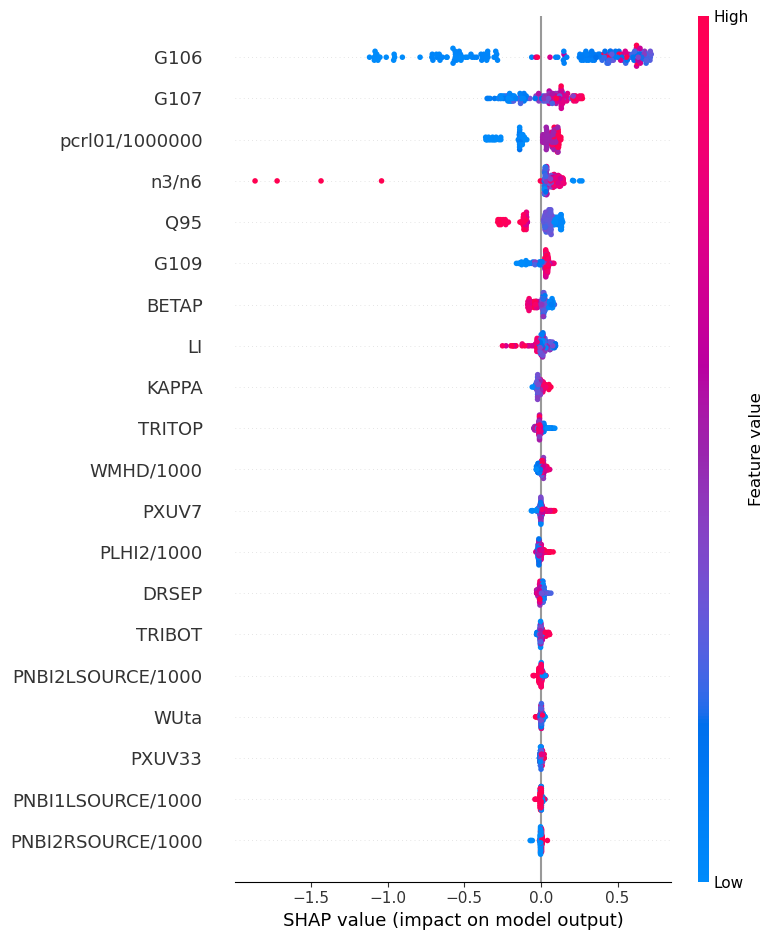

In [22]:
# 我们记录在文件中的数据的特征参数名称
columns_name_list = [ 'WMHD/1000', 'BETAP', 'PLHI2/1000', 'PNBI1LSOURCE/1000', 'PNBI1RSOURCE/1000', 'PNBI2LSOURCE/1000', 'PNBI2RSOURCE/1000', 'G109', 'G107', 'G106', 'KAPPA', 'AMINOR', 'Q95', 'LI', 'TRITOP', 'TRIBOT', 'DRSEP', 'PXUV33', 'PXUV7', 'WUta', 'pcrl01/1000000', 'pecrh', 'n3/n6']
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=columns_name_list)


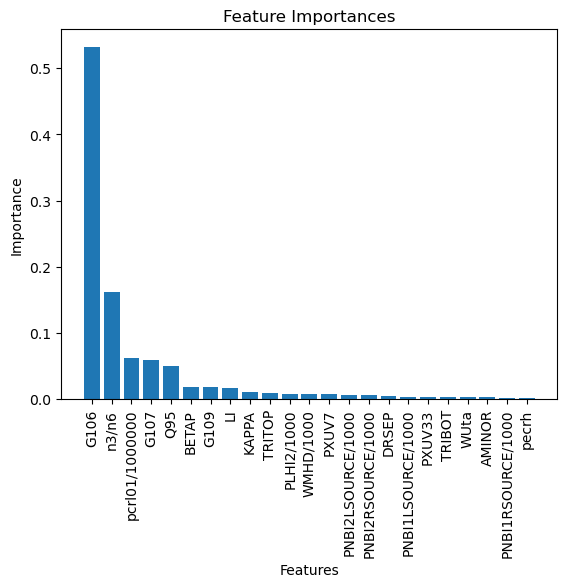

In [23]:
importances = rf.feature_importances_
# 可视化特征的影响度
feature_names = data.columns[1:24]  # 特征名称
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_array.shape[1]), importances[indices])
plt.xticks(range(x_array.shape[1]), feature_names[indices], rotation=90)  # 设置 x 轴标签
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

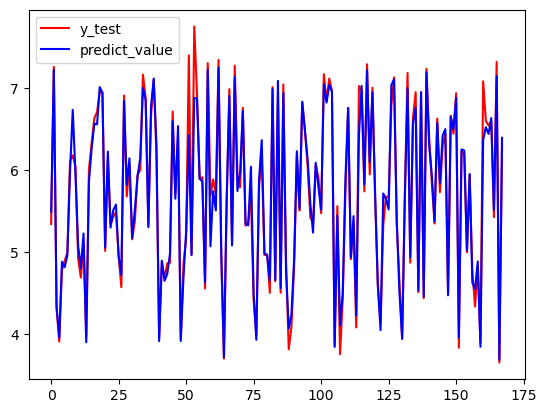

In [24]:



x = range(len(y_test))

plt.plot(x, y_test, color='red', linestyle='-', label='y_test')
plt.plot(x, predict_value, color='blue', linestyle='-', label='predict_value')
plt.legend()
plt.show()


In [25]:
# 手动输入一组变量进行预测
xx = [150.2499902,1.812536438,1.769787594,4.71E-05,-4.48E-07,8.18E-05,4.38E-06,0.01782644,0.780349765,0.005764738,1.643892444,0.437838712,7.673967481,1.224305343,0.641513606,0.427060454,0.006863875,0.486968981,0.427380349,468.1609785,0.335765391,1.809594229,0.785105982]
yy_pred = rf.predict([xx])

# 输出预测结果
print(yy_pred)

[3.84951083]


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_array, y_array, cv=5 ,scoring = "neg_mean_squared_error")

array([-0.13761661, -0.05885622, -0.26049089, -0.13073821, -0.26103283])

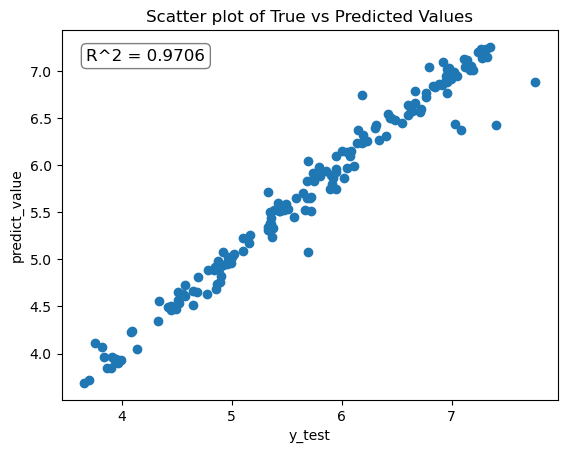

In [27]:

# 计算R方
r2 = r2_score(y_test, predict_value)


# 创建散点图
plt.scatter(y_test,predict_value)
plt.xlabel('y_test')
plt.ylabel('predict_value')
plt.title('Scatter plot of True vs Predicted Values')

# 添加R方文本框
plt.text(0.05, 0.95, f'R^2 = {r2:.4f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

In [28]:
print(r2)

0.9705711683908391


In [31]:
import pickle
from sklearn.ensemble import RandomForestRegressor
with open('random_forest_regression_model_alldata.pkl', 'wb') as file:
    pickle.dump(rf, file)